## Exercise 1

When throwing two fair dice the probabilites of possible values are


<table style="border-collapse: collapse; width: 35.8719%;" border="1">
<tbody>
<tr>
<td style="width: 15.0794%;">2 or 12</td>
<td style="width: 20.7936%;">1/36 = 2.8%</td>
</tr>
<tr>
<td style="width: 15.0794%;">3 or 11</td>
<td style="width: 20.7936%;">2/36 = 5.6%</td>
</tr>
<tr>
<td style="width: 15.0794%;">4 or 10</td>
<td style="width: 20.7936%;">3/36 = 8.3%</td>
</tr>
<tr>
<td style="width: 15.0794%;">5 or 9</td>
<td style="width: 20.7936%;">4/36 = 11.1%</td>
</tr>
<tr>
<td style="width: 15.0794%;">6 or 8</td>
<td style="width: 20.7936%;">5/36 = 13.9%</td>
</tr>
<tr>
<td style="width: 15.0794%;">7</td>
<td style="width: 20.7936%;">6/36 = 16.7%</td>
</tr>
</tbody>
</table>

<br>

The histogram looks like this.
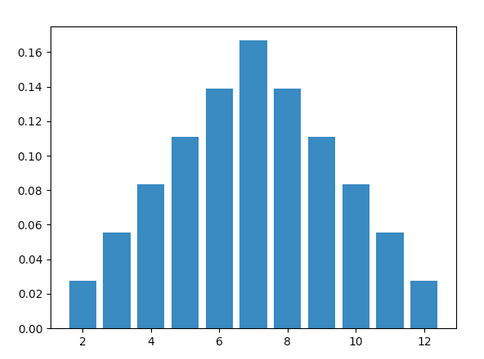
 

1- Write a `for` loop which repeats the steps 1)-3) below for values of `n` ranging as

500, 1000, 2000, 5000, 10000, 15000, 20000, 50000, 100000

2- Use numpy to simulate throwing of two dice n` times. Compute the sum of the dice.

3- Use numpys `histogram()` function to compute the frequencies as

`h,h2 = np.histogram(s,range(2,14))`
where s contains the sum.

4- Use matplotlib's bar function to plot the histogram as

`plt.bar(h2[:-1],h/n)`

and show the value of `n` in the title.

5- What do you observe? You may need to run the loop a few times to see it.

6- How is this related to "regression to the mean"?

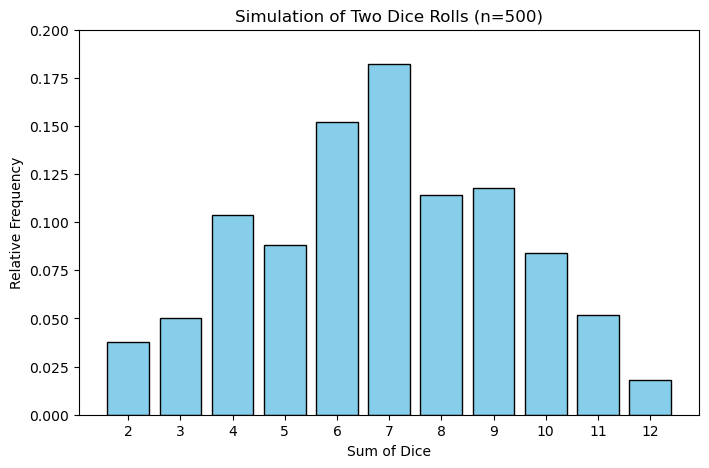

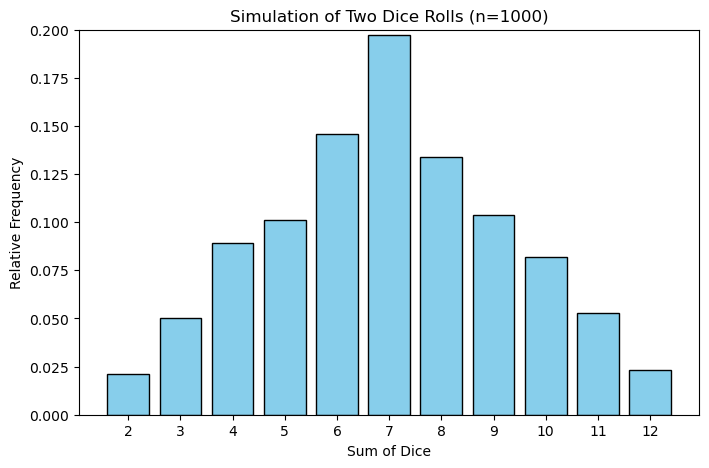

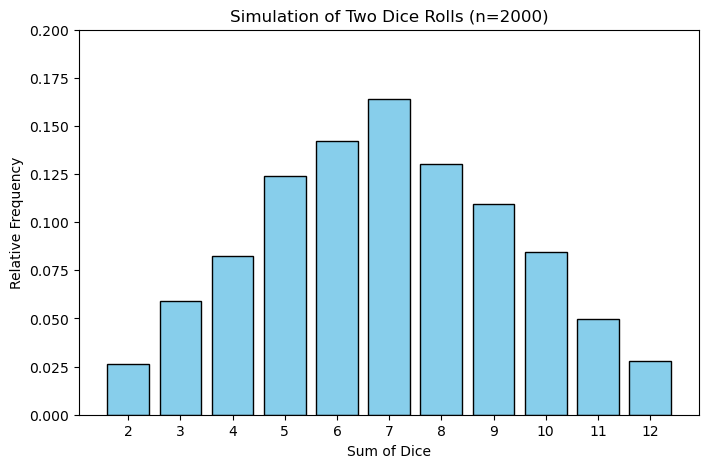

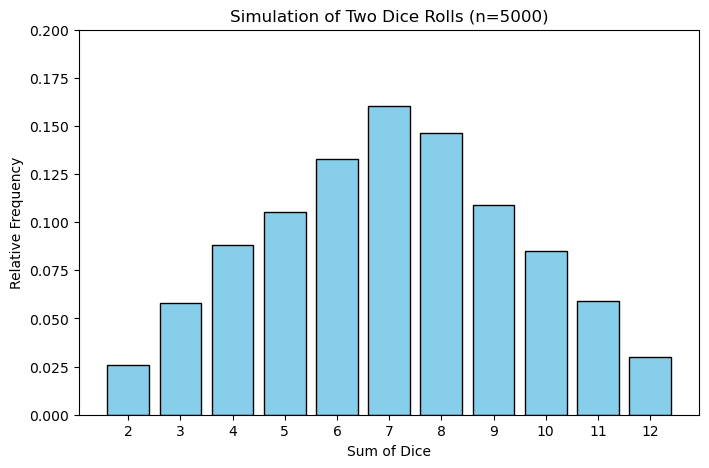

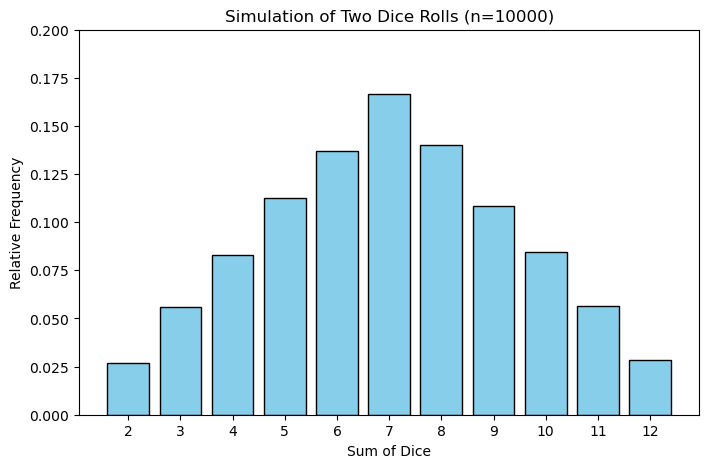

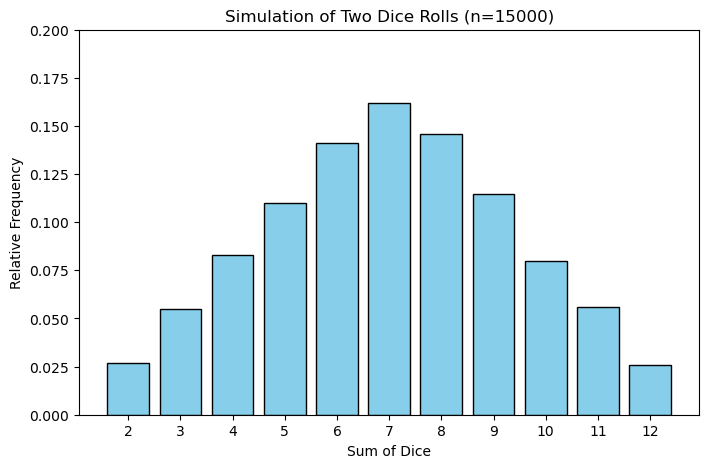

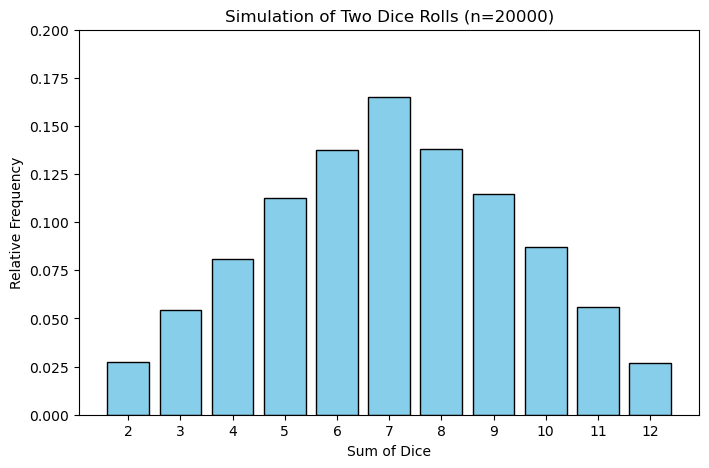

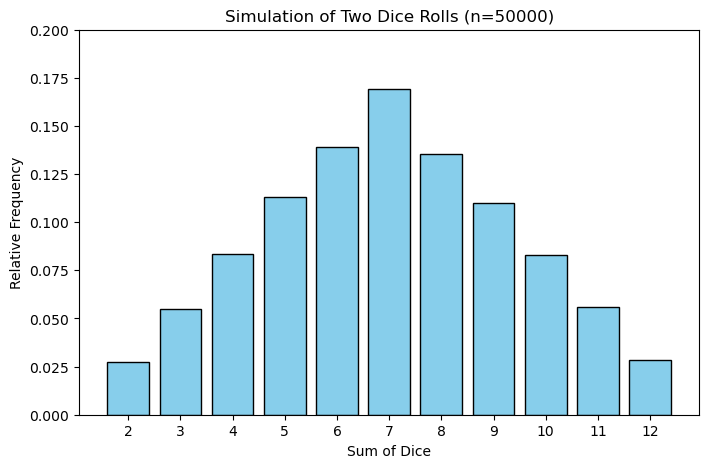

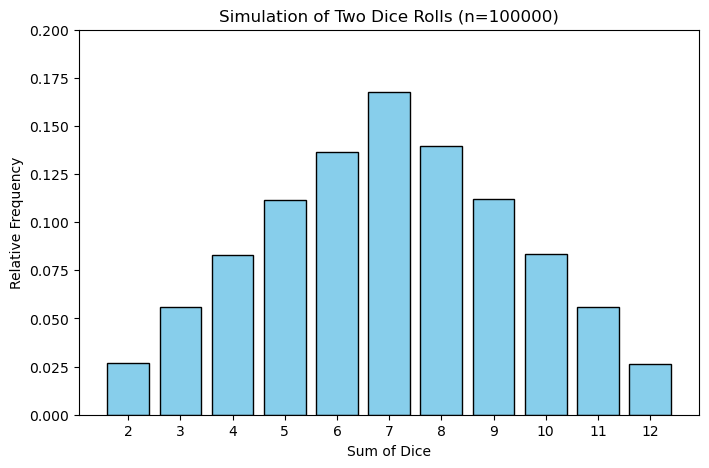

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# List of n values
n_values = [500, 1000, 2000, 5000, 10000, 15000, 20000, 50000, 100000]

for n in n_values:
    # Step 2: Simulate throwing two dice n times
    die1 = np.random.randint(1, 7, n)  # Random integers 1-6
    die2 = np.random.randint(1, 7, n)
    s = die1 + die2  # Sum of the two dice
    
    # Step 3: Compute histogram of sums
    h, h2 = np.histogram(s, bins=np.arange(2, 14))  # bins from 2 to 13
    
    # Step 4: Plot histogram
    plt.figure(figsize=(8, 5))
    plt.bar(h2[:-1], h/n, width=0.8, color='skyblue', edgecolor='black')
    plt.title(f'Simulation of Two Dice Rolls (n={n})')
    plt.xlabel('Sum of Dice')
    plt.ylabel('Relative Frequency')
    plt.xticks(range(2, 13))
    plt.ylim(0, 0.2)
    plt.show()


## Exercise 2

Consider the data from the file weight-height.csv.

1- Inspect the dependence between height and weight using a scatter plot. You may use either of the variables as independent variable.

2- Choose appropriate model for the dependence

3- Perform regression on the data using your model of choice

4- Plot the results

5- Compute RMSE and R2 value

6- Assess the quality of the regression (visually and using numbers) in your own words.

You are not required to split the dataset into training and testing sets. Of course you are completely free to experiment it here already.

It is recommended that you use the module sklearn for all your computations.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


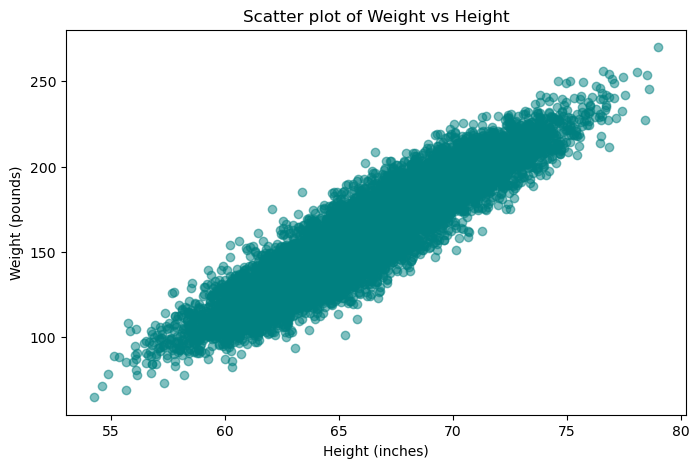

In [5]:
# Load CSV
data = pd.read_csv('weight-height.csv')

# Inspect the first few rows
print(data.head())

# Scatter plot to see dependence
plt.figure(figsize=(8,5))
plt.scatter(data['Height'], data['Weight'], alpha=0.5, color='teal')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Scatter plot of Weight vs Height')
plt.show()


In [7]:
# Define independent and dependent variables
X = data[['Height']]  # 2D array required for sklearn
y = data['Weight']

# Initialize and fit linear regression
model = LinearRegression()
model.fit(X, y)

# Predict weight
y_pred = model.predict(X)


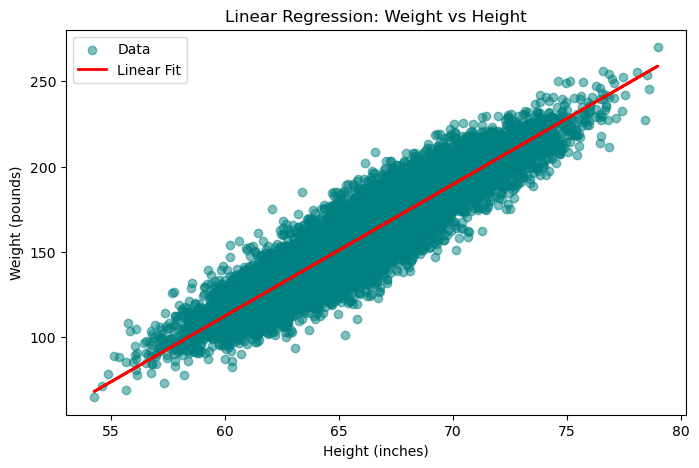

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(X, y, alpha=0.5, color='teal', label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Fit')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)')
plt.title('Linear Regression: Weight vs Height')
plt.legend()
plt.show()


In [10]:
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.3f}')


RMSE: 12.22
R²: 0.855
